In [5]:
%cd /qbio/nest/alpaca/Tutorial

import numpy as np
import matplotlib.pyplot as plt
import math


#Generating dictoinary containing gene tags and their counts

def makedata(addr):

    with open(addr) as file_data:

        Result = {}
        for line in file_data:
            if line.startswith('@'):
                continue
            else:
                tmp1 = line.split('\t')
                if tmp1[1] == 4:
                    continue
                else:
                    tmp2 = tmp1[2].split('|')
                    tmp1[2] = tmp2[1]
                    if (tmp1[2] in Result):
                        Result[tmp1[2]] = Result[tmp1[2]] + 1
                    else:
                        Result[tmp1[2]] = 1
        return Result


/qbio/nest/alpaca/Tutorial


In [6]:
Rseq_untreated = makedata('Align_RNA-seq-untreated/Aligned.out.sam')
Rseq_siLuc = makedata('Align_RNA-seq-siLuc/Aligned.out.sam')
Rseq_siLin28a = makedata('Align_RNA-seq-siLin28a/Aligned.out.sam')
CLIP_Lin28a = makedata('Align_Lin28a-CLIP-35L33G/Aligned.out.sam')
RiboProf_siLin28a = makedata('Align_RiboProf-siLin28a/Aligned.out.sam')
RiboProf_siLuc = makedata('Align_RiboProf-siLuc/Aligned.out.sam')

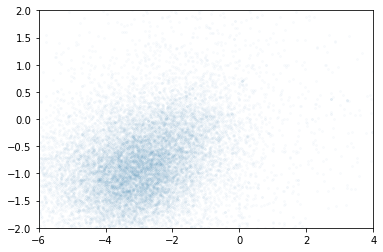

In [7]:
#Calculating Lin28A CLIP enrichment

Xelements = {}

for a in CLIP_Lin28a:
    if a in Rseq_untreated:
        Xelements[a] = math.log(CLIP_Lin28a[a]/Rseq_untreated[a], 2)
    else:
        continue

#Calculating Ribosome density change upon Lin28a KO

tmp1 = {}
tmp2 = {}
Yelements = {}

for a in RiboProf_siLin28a:
    if a in Rseq_siLin28a:
        tmp1[a] = RiboProf_siLin28a[a]/Rseq_siLin28a[a]
    else:
        continue

for a in RiboProf_siLuc:
    if a in Rseq_siLuc:
        tmp2[a] = RiboProf_siLuc[a]/Rseq_siLuc[a]
    else:
        continue
        
for a in tmp1:
    if a in tmp2:
        Yelements[a] = math.log(tmp1[a]/tmp2[a], 2)
    else:
        continue

#Generate a list of data to plot

TmpData = []

for a in Xelements:
    if a in Yelements:
        tmp = [Xelements[a], Yelements[a]]
        TmpData.append(tmp)
    else:
        continue

Data = np.array(TmpData)      

#Plot figure 4.D

x, y = Data.T
plt.ylim(-2, 2)
plt.xlim(-6, 4)
plt.scatter(x,y,s=4,alpha=.02)
plt.show()